In [1]:
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

matplotlib.rcParams['figure.figsize'] = [9, 6]


def project_xy(angle:float, length:float):
    return math.cos(angle) * length, math.sin(angle) * length

def angle_length(x:float, y:float):
    length = math.sqrt(x**2 + y**2)
    if length == 0:
        return 0,0
    angle = math.atan2(y/length,x/length)
    return angle, length

def v_length(x,y):
    return math.sqrt(x**2 + y**2)

In [2]:
class World(object):
    
    def __init__(self):
        self.MAX_TURN_RATE_HOUR = math.radians(120) * 60  # max 120 degrees per minute, 360 in 3 minutes
        self.MAX_DEEP_RATE_FEET = 1  # 1 foot per second
        self.MAX_SPEED = 36.0  # Knots or nautical mile per hour
        self.MAX_ACCELERATION = 0.1 * 3600  # acceleration in knots/hour^2 -> imax acceleration 2 Knots / second^2
        self.DRAG_FACTOR = 1.0 * self.MAX_ACCELERATION / (self.MAX_SPEED ** 2)
        
        # turbines 35,000 hp (26 MW), 1 auxiliary motor 325 hp (242 kW)
        self.turbine_level = 50.0 # from -100% to +100%
        self.drag_factor = 0.0
        self.drag = 0.0
        self.drag_x = 0.0
        self.drag_y = 0.0
        self.ship_bearing = 0.0  # the angle of the ship is rotated in relation to north, in radians
        self.speed = 0.0 # knots
        self.acceleration_angle = 0.0
        self.acceleration = 0.0 
        self.acceleration_x = 0.0
        self.acceleration_y = 0.0
        self.speed_x = 0.0 # 
        self.speed_y = 0.0 # 
        self.position_x = 0.0
        self.position_y = 0.0
        self.time = datetime.datetime(2022,1,1,0,0,0)
        
        # moving_direction: the direction the ship is moving in relation to north, in radians
        self.moving_direction, self.speed = angle_length(self.speed_x, self.speed_y)

        self.rudder = 0 # rudder in radians per minute

    
    def turn(self, time_elapsed:float):
        self.time = self.time + datetime.timedelta(seconds=time_elapsed*3600)
        self.turbine_acc = self.MAX_ACCELERATION * self.turbine_level / 100
#         self.turbine_acc_x, self.turbine_acc_y = project_xy(world.ship_bearing, self.turbine_acc)

        if world.rudder != 0:
            # diff is the difference between the angle the sub is mov ing and the angle of the ship is bearing
            # meaning the ship the turning left or right
            diff = (world.rudder * time_elapsed * self.speed)
            self.acceleration_angle = self.ship_bearing - diff
            self.drag_factor = self.DRAG_FACTOR * (1 + abs(500 * math.sin(diff)))
        else:
            self.acceleration_angle = self.ship_bearing
            self.drag_factor = self.DRAG_FACTOR
            

        #     diff = self.course - world.ship_bearing

        #     # correction if the drag factor since the sub is making a turn
        self.drag_factor = self.DRAG_FACTOR # * (1 + abs(500 * math.sin(diff)))

        # drag force
        self.drag = self.drag_factor * (self.speed ** 2)

        self.acceleration = self.turbine_acc # - self.total_drag
        
        # calculates all forces that actuates in the ship
    
        # turbine accelerates in direction the ship in bearing
        self.acceleration_x, self.acceleration_y = project_xy(self.acceleration_angle, self.acceleration)
        
        # drags accelerates against the current movement
        self.drag_x, self.drag_y = project_xy(self.moving_direction, -1.0 * self.drag)
        
        # updates speed and position
        self.speed_x += (self.acceleration_x + self.drag_x) * time_elapsed #
        self.speed_y += (self.acceleration_y * self.drag_y) * time_elapsed #
        self.moving_direction, self.speed = angle_length(self.speed_x, self.speed_y)
        self.position_x += (self.speed_x * time_elapsed) #
        self.position_y += (self.speed_y * time_elapsed) #
        

        
    def debug_pos(self):
        return f'{self.time.strftime("%H:%m:%S")} t_level: {self.turbine_level:0.2f} t_acc:{self.turbine_acc:0.2f} drag:{self.drag:0.2f}({self.drag_x:0.2f},{self.drag_y:0.2f}) acc:{self.acceleration:0.2f} speed:{self.speed:0.2f} pos:({self.position_x:0.2f},{self.position_y:0.2f})'

In [3]:
# world = World()

# for i in range(1000):
    
#     world.turn(1/3600)
#     print(world.debug_pos())




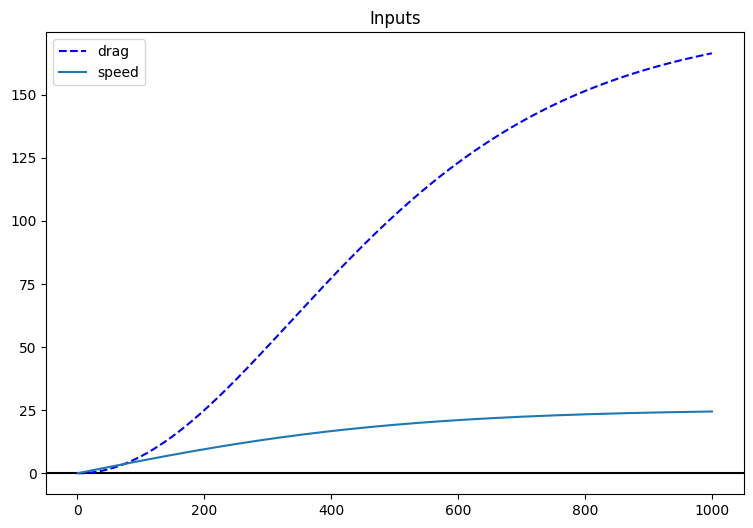

In [4]:
world = World()

speed = []
drag = []
for i in range(1000):
    world.turn(1/3600)
    speed.append(world.speed)
    drag.append(world.drag)
    
    
    

    
x = np.linspace(1, len(speed), len(speed))
plt.axhline(y = 0, color = 'black', linestyle = '-')

plt.plot(x, drag, color = 'b', linestyle = '--', label = 'drag') 
plt.plot(x, speed, label = 'speed')
# plt.plot(x, outputs, linestyle = '-.', color = 'green')
plt.legend()


plt.title('Inputs')
plt.show()

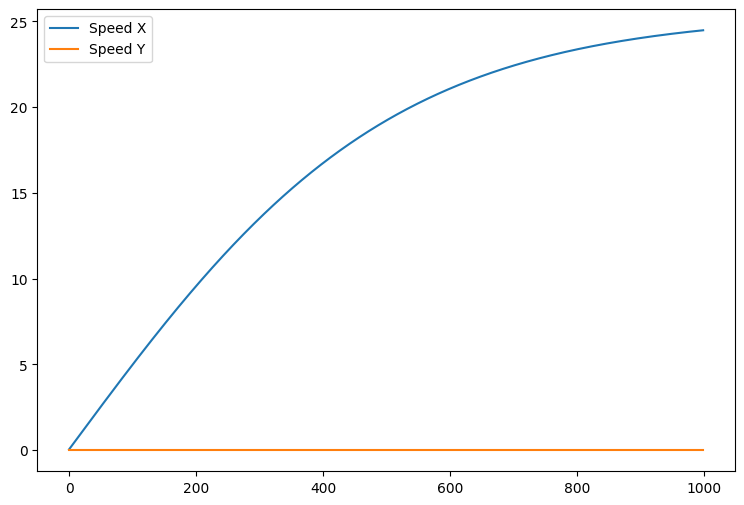

In [5]:

world = World()

world.rudder = 2.0

x = []
speed_x = []
speed_y = []
for i in range(1000):
    x.append(i)
    world.turn(1/3600)
    speed_x.append(world.speed_x)
    speed_y.append(world.speed_y)
#     print(world.debug_pos())
    
plt.plot(x, speed_x, label='Speed X')
plt.plot(x, speed_y, label='Speed Y')
# plt.title('Inputs')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


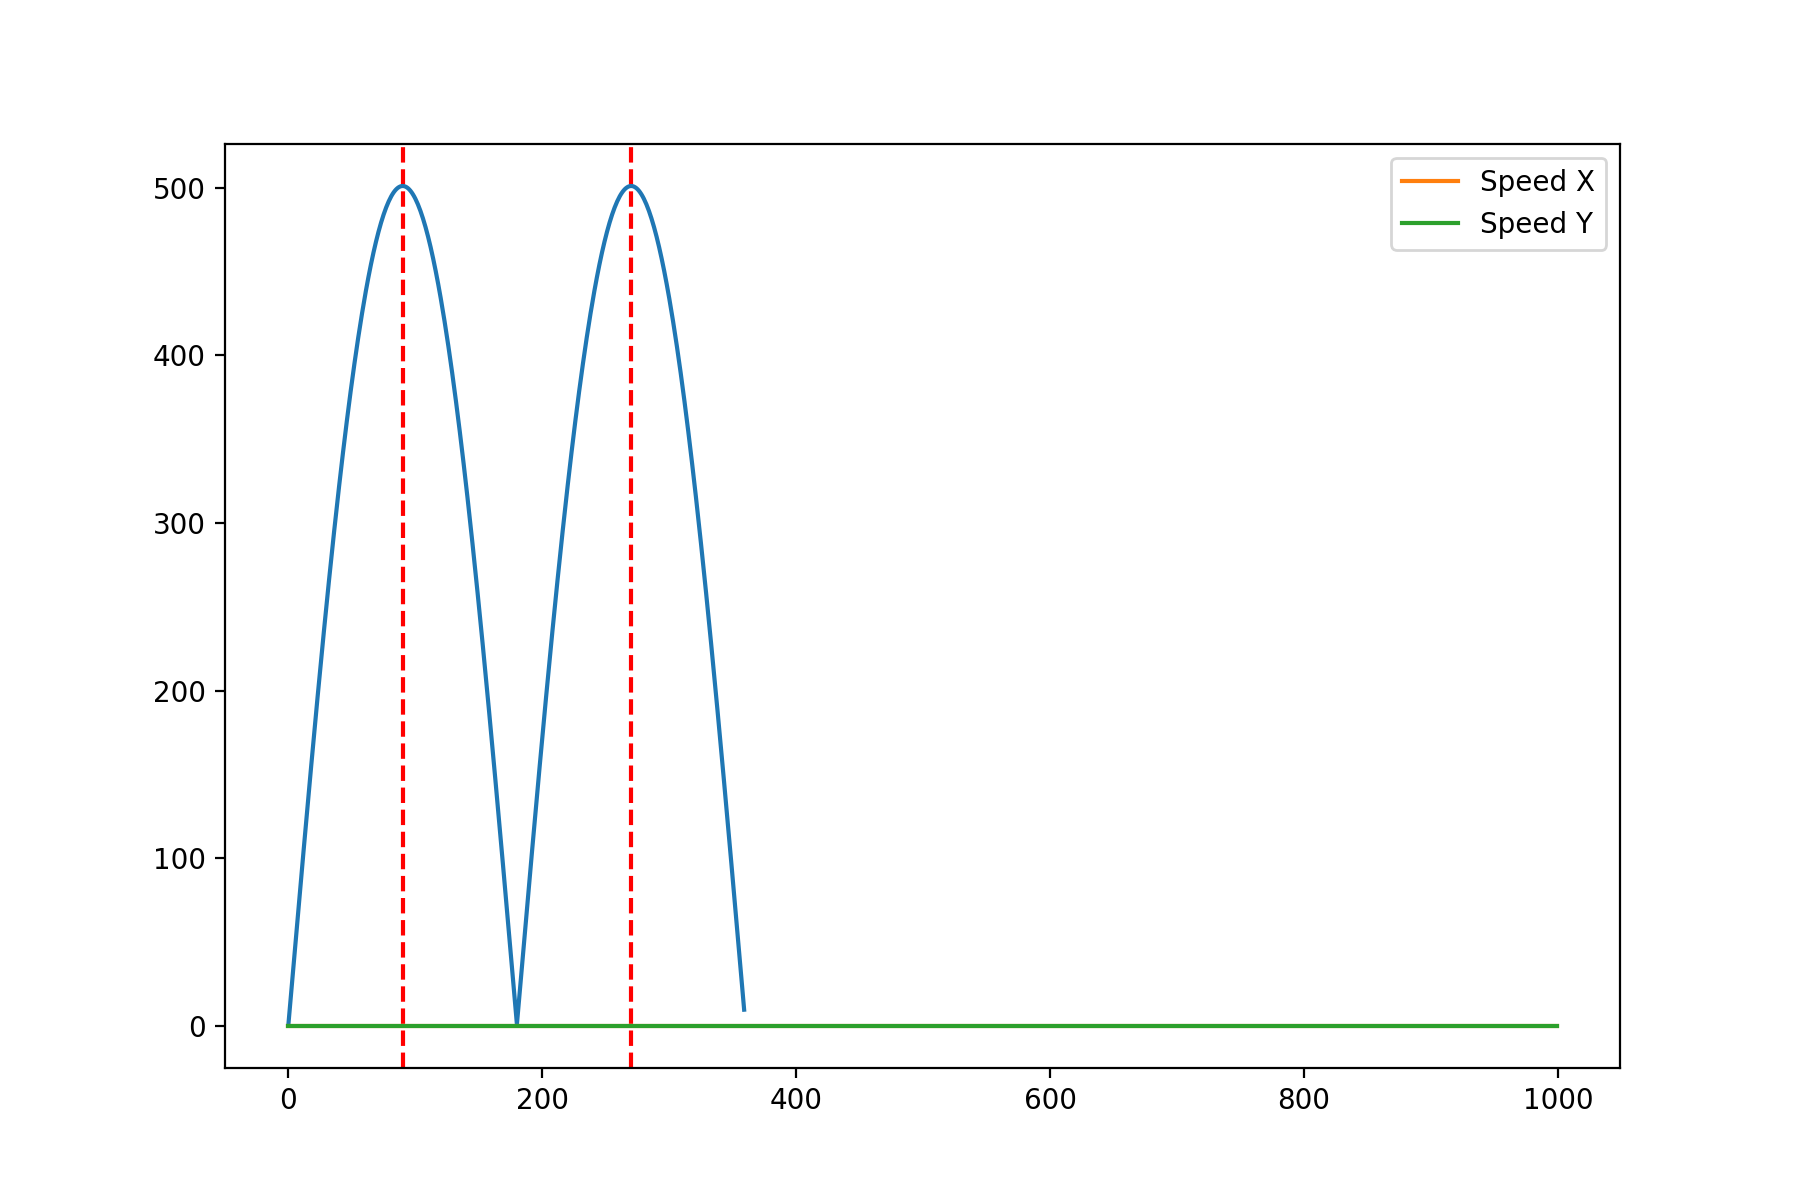

In [26]:

values = []
x = []
for i in range(360):
    x.append(i)
    f = (1 + abs(500 * math.sin(math.radians(i))))
#     print(f'angle :{i:0.5f}  f: {f:0.5f}')
    values.append(f)
    
    
# x = np.linspace(1, 100, len(positions))
plt.axvline(x = 90, color = 'r', linestyle = '--')
plt.axvline(x = 270, color = 'r', linestyle = '--')
plt.plot(x, values)
# plt.title('Inputs')
plt.show()

In [36]:
power = 10
angle = math.radians(30.0)
print(angle,power)

x, y = project_xy(angle, power)
print(x,y)

a, p = angle_length(x,y)
print(a,p)

0.5235987755982988 10
8.660254037844387 4.999999999999999
0.5235987755982987 10.0


In [ ]:
1 What is wrong or fragile today?
Global math helpers

angle_length() – atan2(y/length, x/length) is wrong.
atan2(y, x) already gives the correct direction; dividing by length
distorts the angle.
v_length() duplicates the norm calculation already done in
angle_length().
Unit mix-ups

MAX_ACCELERATION = 0.1 * 3600 is commented as
“2 kn / s²”, but multiplying by 3600 actually
converts h⁻² → s⁻² the wrong way. Decide on one consistent
set of units for the entire physics step (I suggest seconds).
State vs. derivative

Position, speed, acceleration, drag, thrust are mixed in the same class
with no clear separation of state (pos, vel, heading) and inputs
(rudder, turbine_level). This makes bugs such as
self.speed_y += (self.acceleration_y * self.drag_y) (note the
*, not +) easy to slip in unnoticed.
Vector math done by hand

Two functions (project_xy and angle_length) constantly turn angles
into vectors and back again. Use a 2-component numpy array and the code
collapses to two or three clear lines.
The turn() method

References a free variable world; should be self.
Updates self.time in hours while time_elapsed is documented as hours
but later treated as seconds (MAX_DEEP_RATE_FEET = 1  # 1 foot per second).
Drag model

Drag is set to
self.drag_factor = self.DRAG_FACTOR * (1 + abs(500 * sin(diff)))
which explodes whenever the rudder is touched. If you want “induced
drag” proportional to turn rate, relate it to the yaw rate
(dψ/dt), not an arbitrary sinusoid.
Styling

Use PEP-8 names (snake_case) and avoid the leading capital letters for
constants unless they are module-level constants.
Add type hints and docstrings.
